In [1]:
import (
    "os"
    "log"
    "fmt"
    "bytes"
    
    "gonum.org/v1/plot"
    "gonum.org/v1/plot/plotter"
    "gonum.org/v1/plot/vg"
    "github.com/go-gota/gota/dataframe"
)

In [2]:
f, err := os.Open("Advertising.csv")
if err != nil {
    log.Fatal(err)
}
advertDF := dataframe.ReadCSV(f)
f.Close()

In [3]:
func displayPlot(p *plot.Plot) {
    var buf bytes.Buffer
    c, err := p.WriterTo(6*vg.Inch, 6*vg.Inch, "png")
    if err != nil {
        panic(err)
    }
    
    if _, err := c.WriteTo(&buf); err != nil {
        panic(err)
    }
    
    Display(display.PNG(buf.Bytes()))
}

In [4]:
func displayHistogram(colName string) {
    plotVals := make(plotter.Values, advertDF.Nrow())
    for i, floatVal := range advertDF.Col(colName).Float() {
        plotVals[i] = floatVal
    }

    p := plot.New()
    p.Title.Text = fmt.Sprintf("Histogram of a %s", colName)
    
    h, err := plotter.NewHist(plotVals, 16)
    if err != nil {
        log.Fatal(err)
    }
    
    h.Normalize(1)
    
    p.Add(h)
    
    displayPlot(p)
}

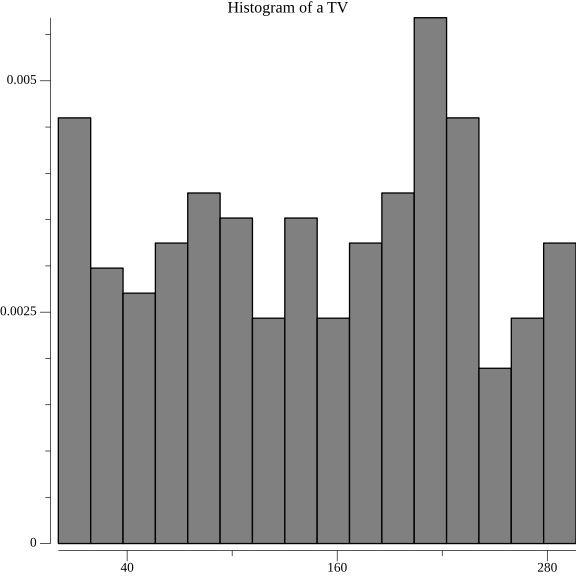

In [5]:
displayHistogram("TV")

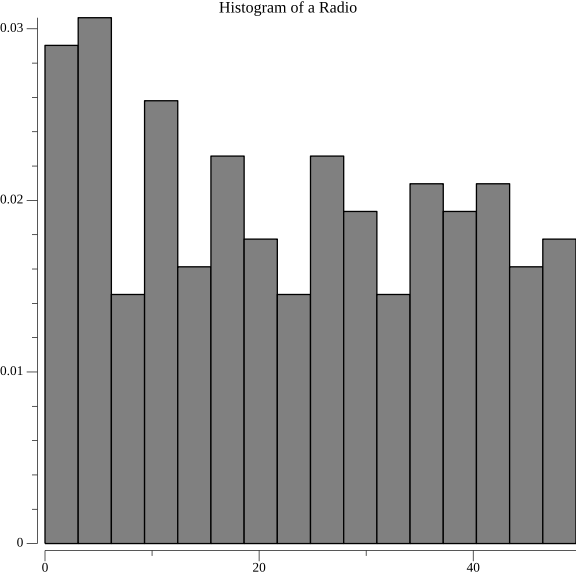

In [6]:
displayHistogram("Radio")

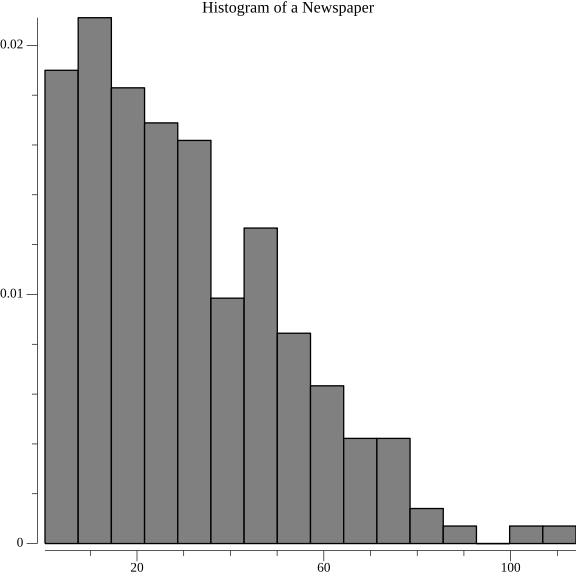

In [7]:
displayHistogram("Newspaper")

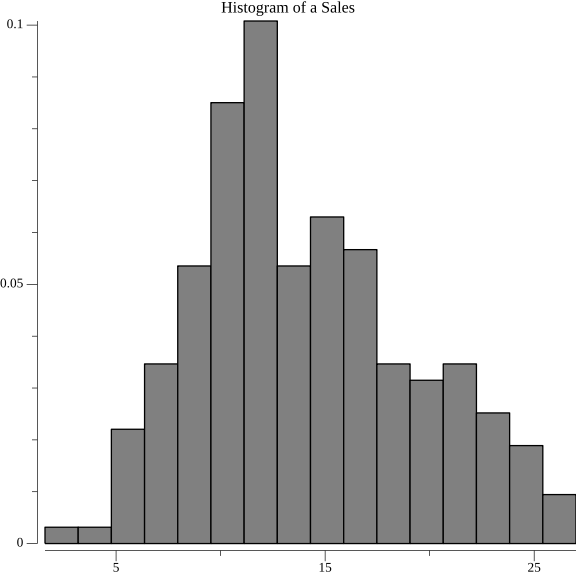

In [8]:
displayHistogram("Sales")